<a href="https://colab.research.google.com/github/Mwadz/IP-week-6/blob/main/Week_6_Machine_Learning_Regression_Cynthia_Mwadime_2022_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Ltd prediction result

We are to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly We should include rank in your training.

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

[Documentation](https://docs.google.com/document/d/1GEZxGovmBjlZhn3u4rRL25M7xxuzR8xOBxX2RgSzHZQ/edit?usp=sharing)

**Context**

The men's FIFA World Ranking is a ranking system for men's national teams in association football.a more detailed explanation and history of the rankings is available [here](https://en.wikipedia.org/wiki/FIFA_World_Rankings) 

# Importing Libraries

In [1026]:
import numpy as np
import pandas as pd


# Loading the Datasets

In [1027]:
# loading the results and ranking datasets
rank = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')


# Exploration

## Rank Dataset

In [1028]:
# viewing the rank dataset shape
rank.shape

(57793, 16)

In [1029]:
# previewing the fifa ranking dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [1030]:
# getting information on the results dataset
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [1031]:
# changing the rank_date column datatype
rank['rank_date'] = pd.to_datetime(rank['rank_date'])

In [1032]:
# viewing the count, mean, maximum and minimum values, standard deviation and percentiles of numerical columns
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [1033]:
rank.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [1034]:
#renaming rank_date column to match the results dataframe to make merging possible
rank.rename(columns={"rank_date":"date"}, inplace=True)

In [1035]:
# confirming that there are no null values in the rank df
rank.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
date                       0
dtype: int64

In [1036]:
# checking for duplicates
rank.duplicated().sum()

37

There are 37/57793 duplicated rows. These are dropable since they only make up 0.0006402159431072968  of the total proportion 0.064%

In [1037]:
# dropping the duplicates
rank.drop_duplicates(keep=False, inplace=True)
# confirming
rank.duplicated().sum()

0

## Results Dataset

In [1038]:
# viewing the reslts dataset shape
results.shape

(40839, 9)

In [1039]:
# previewing the fifa results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [1040]:
# getting information on the results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**Observation**: looks like we'll have to change the date datatype from object to date

In [1041]:
# changing the date column datatype
results['date'] = pd.to_datetime(results['date'])

In [1042]:
# viewing the count, mean, maximum and minimum values, standard deviation and percentiles of numerical columns
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [1043]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [1044]:
# confirming that there are no null values in the results df
results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [1045]:
results.duplicated().sum()

0

## Merging the Datasets

In [1046]:
# merging the columns we'll use while working out the questions
soccer = pd.merge(results,rank[['country_full', 'date', 'rank']],how='left', left_on=['date','country'], right_on=['date','country_full'])

* We have a new df socccer which we'll use while performing regresssion

In [1047]:
# checking to see whether everything's in order
soccer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40839 entries, 0 to 40838
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          40839 non-null  datetime64[ns]
 1   home_team     40839 non-null  object        
 2   away_team     40839 non-null  object        
 3   home_score    40839 non-null  int64         
 4   away_score    40839 non-null  int64         
 5   tournament    40839 non-null  object        
 6   city          40839 non-null  object        
 7   country       40839 non-null  object        
 8   neutral       40839 non-null  bool          
 9   country_full  950 non-null    object        
 10  rank          950 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 3.5+ MB


**Observations**
* looks like we have missing values in our rank and country_full columns
* country_full and country columns are similars so that makes the country_full column dispensable
*the rank column we'll use in prediction as our y so we have to get rid of the null values regardless of how many they are


In [1048]:
# Dropping thr country_full column
soccer.drop(['country_full','city', 'country'], axis=1, inplace=True)
soccer.head(3)

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank
0,1872-11-30,Scotland,England,0,0,Friendly,False,NaN
1,1873-03-08,England,Scotland,4,2,Friendly,False,NaN
2,1874-03-07,Scotland,England,2,1,Friendly,False,NaN


In [1049]:
# getting rid of the records with missing values
soccer2 = soccer.dropna(axis=0)
soccer2.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
neutral       0
rank          0
dtype: int64

In [1050]:
# cchecking for duplicates
soccer2.duplicated().sum()

0

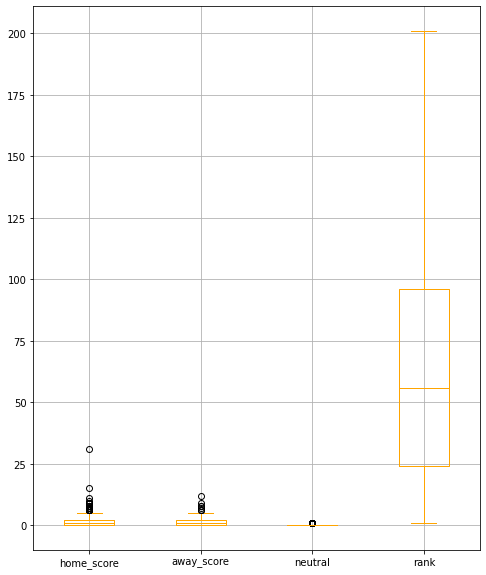

In [1051]:
# prompting system to ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# checking for outliers
soccer2.boxplot(figsize=(8,10),color='orange');

In [1052]:
# setting our y as rank

y= soccer2['rank']

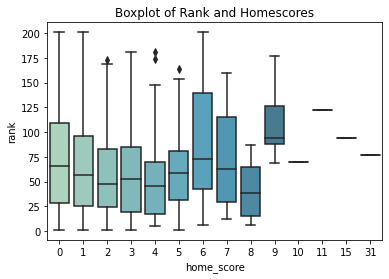

In [1053]:
import seaborn as sns
import matplotlib.pyplot as plt

# can add pallete to boxplot
sns.boxplot(soccer2['home_score'],y ,palette='GnBu_d')
plt.title("Boxplot of Rank and Homescores")
plt.show()


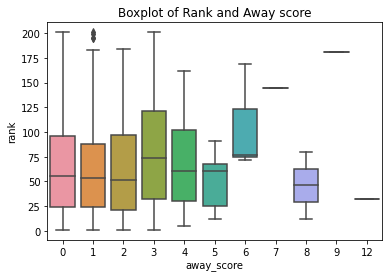

In [1054]:
# can add pallete to boxplot
sns.boxplot(soccer2['away_score'],y)
plt.title("Boxplot of Rank and Away score")
plt.show()

* The data seems to show that there's no significant difference between home and away score outliers. The outliers might help in prediction so we wont be removing them.

In [1055]:
soccer2.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,rank
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59.0
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,8.0


## Feature Engineering

In [1056]:
# feature engineering: generating a Win, Lose or Draw column and naming it wld
# first we define a function that iterates through the records returning either 
# a W, L or D depending on the home and away score columns
def wld(rec):
  if rec['home_score'] > rec['away_score']:
    result = 'W'
  elif rec['home_score'] < rec['away_score']:
    result = 'L'
  else:
    result = 'D'
  return result

# Then here we define the column and dictate what it'll be filled with
soccer2['result'] = soccer2.apply(wld, axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



* The function we've created gives a win if the home score is greater than the away score as 'W'
* if the home score is less than the away score it records a loss as 'L' 
* if they are equal it records a draw as 'D' 


In [1057]:
# creating a year column and dropping date column
soccer2['year'] = soccer2.date.dt.year
soccer2.drop(['date'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1058]:
#previweing the new columns result and year
soccer2.head(3)

,home_team,away_team,home_score,away_score,tournament,neutral,rank,result,year
17915,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,59.0,W,1993
17916,Brazil,Mexico,1,1,Friendly,False,8.0,D,1993
17917,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False,35.0,W,1993


# EDA

## Descriptive statistcs

In [1059]:
# checking the discriptive analysis
soccer2.describe()

,home_score,away_score,rank,year
count,950.000000,950.000000,950.000000,950.000000
mean,1.657895,1.042105,64.905263,2004.930526
std,1.918743,1.234521,48.075168,5.627665
min,0.000000,0.000000,1.000000,1993.000000
25%,0.000000,0.000000,24.000000,2000.000000
50%,1.000000,1.000000,56.000000,2005.000000
75%,2.000000,2.000000,96.000000,2010.000000
max,31.000000,12.000000,201.000000,2018.000000


In [1060]:
# finding out the most popular tournaments in our dataset
df = soccer2.tournament.value_counts()
sorted = pd.DataFrame(df)
sorted.columns

top_10 = sorted.iloc[:10] 
top_10

,tournament
Friendly,600
FIFA World Cup qualification,153
UEFA Euro qualification,41
AFC Asian Cup qualification,37
CONIFA World Football Cup,15
Cyprus International Tournament,8
AFF Championship,7
Gulf Cup,7
Copa América,6
CECAFA Cup,6


In [1061]:
print('More Specific home team result ratios: ')
soccer2.result.value_counts()

More Specific home team result ratios: 


W    462
L    247
D    241
Name: result, dtype: int64

## Univariate Analysis

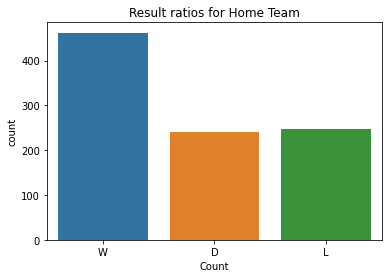

In [1062]:
%matplotlib inline
sns.countplot(data=soccer2, x='result')
plt.title("Result ratios for Home Team")
plt.xlabel("Count")
plt.show()

* most of our matches resulted in wins while losses and draws are almost the same proportion.. therefor we considerstratified sampling using this feature.

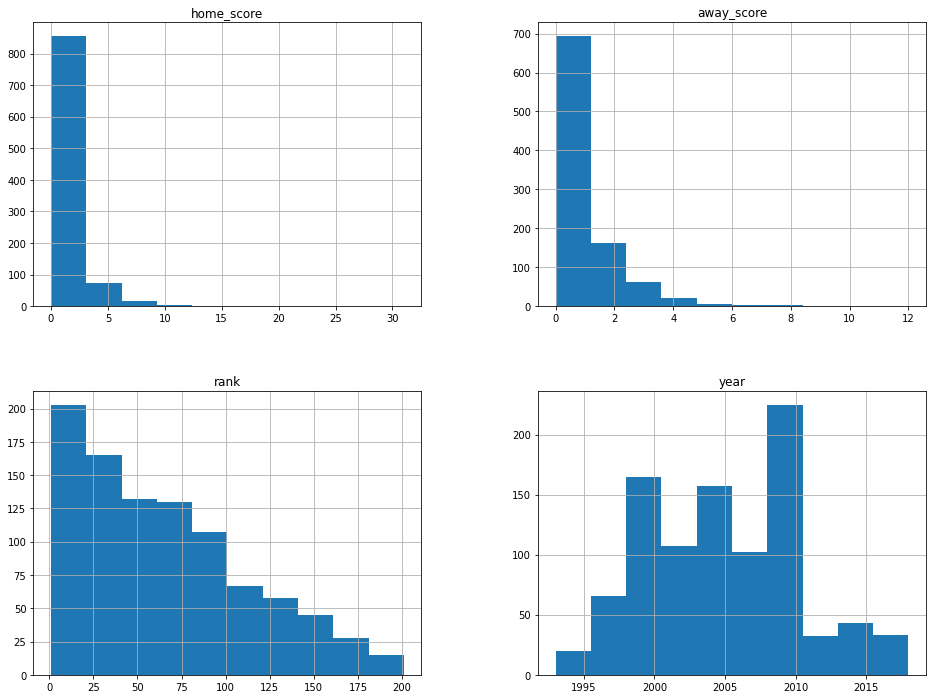

In [1063]:
# plotting the histogram for every variable
soccer2.hist(bins=10, figsize=(16,12))
plt.show()

**Observations**
* most of our data is from 2000-2010
* most scores per game are < 5 
* most ranks are high suggesting lots of ties

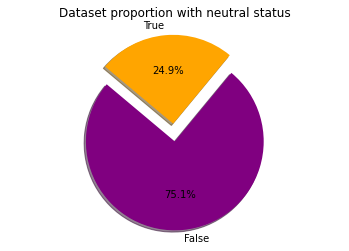

In [1064]:
# finding out what proportion of our dataset has children
plt.pie(results['neutral'].value_counts(normalize=True), labels =results['neutral'].value_counts().index,colors = ['purple', 'orange'], autopct = '%1.1f%%', shadow = True,explode=(0.2,0), startangle = 140)
plt.axis('equal')
plt.title('Dataset proportion with neutral status')
plt.show()

## Bivariate Analysis

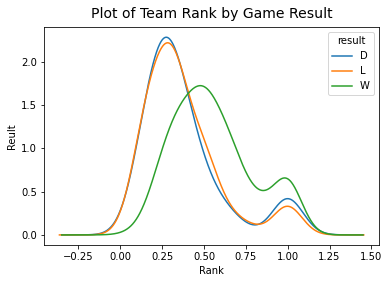

In [1136]:
# comparing the team ranks vs status of the game

# Plotting our line graph
soccer4.groupby('rank')['result'].value_counts(normalize=True).unstack().plot(kind='kde')

# Giving a title to our line graph
plt.title('Plot of Team Rank by Game Result', fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Result')

# Labelling the x-axis
plt.xlabel('Rank')
 
# Displaying our graph
plt.show()

In [1065]:
# Installing heatmapz
!pip install heatmapz


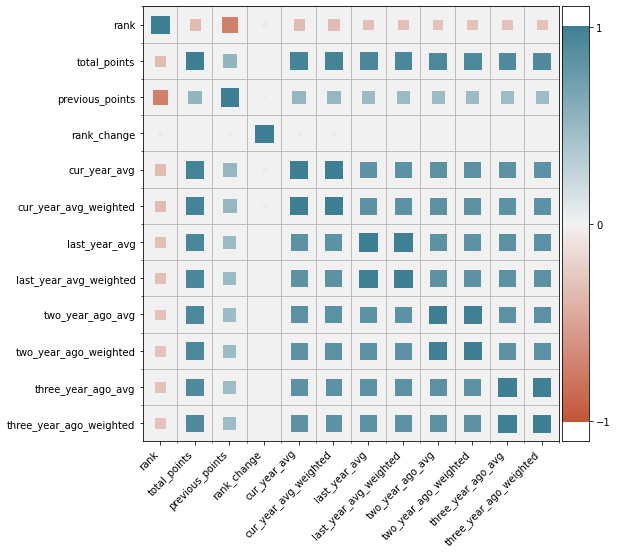

In [1066]:
# Importing the two methods from heatmap library
from heatmap import heatmap, corrplot

# checking for correlation in the rank dataset
plt.figure(figsize=(8, 8))
corrplot(rank.corr(), size_scale=300);

**Observations**

* Rank is negatively correlated to previous points which makes sence since the higher your rank the more points you'll have had
* Total points is postitively correlated with every other column exept the rank column

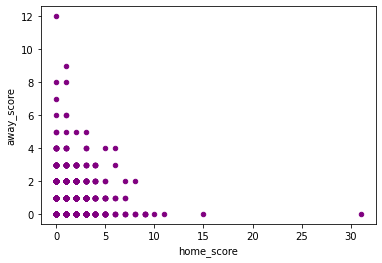

In [1133]:
# lotting home scores against away scores
soccer2.plot(x = 'home_score', y = 'away_score', kind='scatter', color='purple')

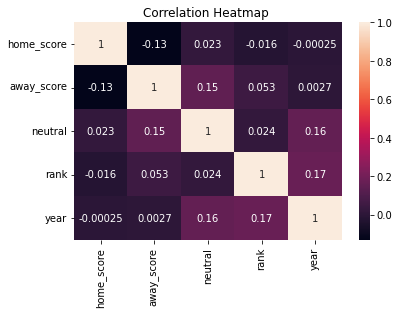

In [1067]:
# Checking correlation in our merged dataset
plt.title('Correlation Heatmap ')
sns.heatmap(soccer2.corr(), annot=True)
plt.show()

# Label Encoding

In [1068]:
# importing label encoding library
from sklearn.preprocessing import LabelEncoder
LabelEncoder =LabelEncoder()


In [1069]:
soccer2.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'rank', 'result', 'year'],
      dtype='object')

## For Multicollinearity Analysis

In [1070]:
# making a duplicate of the soccer2 df
soccer3 =soccer2.copy(deep=True)

# changing datatypes to category
soccer3['neutral']=soccer3['neutral'].astype('category')
soccer3['home_team']=soccer3['home_team'].astype('category')
soccer3['tournament']=soccer3['tournament'].astype('category')
soccer3['away_team']=soccer3['away_team'].astype('category')
soccer3['result']=soccer3['result'].astype('category')



# checking to confirm change
soccer3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 17915 to 39833
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   home_team   950 non-null    category
 1   away_team   950 non-null    category
 2   home_score  950 non-null    int64   
 3   away_score  950 non-null    int64   
 4   tournament  950 non-null    category
 5   neutral     950 non-null    category
 6   rank        950 non-null    float64 
 7   result      950 non-null    category
 8   year        950 non-null    int64   
dtypes: category(5), float64(1), int64(3)
memory usage: 88.6 KB


In [1071]:
# manual version:
soccer3['neutral']=LabelEncoder.fit_transform(soccer3['neutral'])
soccer3['tournament']=LabelEncoder.fit_transform(soccer3['tournament'])
soccer3['result']=LabelEncoder.fit_transform(soccer3['result'])
soccer3['year']=LabelEncoder.fit_transform(soccer3['year'])
soccer3['home_team']=LabelEncoder.fit_transform(soccer3['home_team'])
soccer3['away_team']=LabelEncoder.fit_transform(soccer3['away_team'])




# previewing the result
soccer3.head()

,home_team,away_team,home_score,away_score,tournament,neutral,rank,result,year
17915,23,185,3,1,17,0,59.0,2,0
17916,26,106,1,1,18,0,8.0,0,0
17917,50,188,5,0,17,0,35.0,2,0
17918,71,154,1,0,18,0,65.0,2,0
17919,132,8,1,3,17,0,67.0,1,0


* might end up revising this

## For Logistic Regression

In [1072]:
# making a duplicate of the soccer2 df and naming it soccer4
soccer4 =soccer2.copy(deep=True)

# changing datatypes to category
soccer4['neutral']=soccer4['neutral'].astype('category')
soccer4['tournament']=soccer4['tournament'].astype('category')

# #label encoding the categorical data
soccer4['neutral']=LabelEncoder.fit_transform(soccer4['neutral'])
soccer4['tournament']=LabelEncoder.fit_transform(soccer4['tournament'])

In [1073]:
# confirmation
soccer4.head(3)

,home_team,away_team,home_score,away_score,tournament,neutral,rank,result,year
17915,Bolivia,Uruguay,3,1,17,0,59.0,W,1993
17916,Brazil,Mexico,1,1,18,0,8.0,D,1993
17917,Ecuador,Venezuela,5,0,17,0,35.0,W,1993


# Declaring Target and Features

In [1074]:
# declaring target and feature variables
# features
m = soccer3[['tournament','away_score','home_score', 'away_team','home_team']]
# target variable
j = soccer3[['rank']]# this one will change to home_team and away_team depending on the questions

In [1075]:
# creating our training and test sets for logical regression
X = soccer4.drop(['result', 'home_team', 'away_team'], 1)
y = soccer4['result']

# Questions
**Using the polinomial approach**

Q1. Predict how many goals the home team scores.

Q2. Predict how many goals the away team scores.

**Using the logistic approach**

Q3. Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


In [1076]:
# importing sklearn Libraries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LogisticRegression

# importing LDA libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



# Logistic Approach






# Q3.

Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [1077]:
# Finding out once more the count values for Wins(2), Losses(1) and draws(0)
soccer4.result.value_counts()

W    462
L    247
D    241
Name: result, dtype: int64

In [1078]:
soccer4.head(2)

,home_team,away_team,home_score,away_score,tournament,neutral,rank,result,year
17915,Bolivia,Uruguay,3,1,17,0,59.0,W,1993
17916,Brazil,Mexico,1,1,18,0,8.0,D,1993


## LDA

In [1079]:
# performing LDA
lda= LDA()

lda_ = lda.fit(X, y)
lda_feature = lda_.transform(X)

* we are employing the use of LDA since it's mainly used in classification problems where you have a categorical output variable(result in our case).
* It allows both binary classification and multi-class classification.

In [1080]:
#Displaying the coefficient of reducted columns
lda_.coef_

array([[-3.11127520e-01, -1.42837506e-01,  3.00820138e-03,
         7.42158627e-02,  7.47250441e-04, -3.15641779e-03],
       [-6.71991725e-01,  1.66661916e+00,  1.19225103e-02,
        -1.08065236e-01,  4.68494055e-03, -2.48139046e-04],
       [ 5.21566425e-01, -8.16517516e-01, -7.94336923e-03,
         1.90608019e-02, -2.89451877e-03,  1.77919271e-03]])

In [1081]:
# framing the coefficient value for each feature
coef = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
coef.sort_values(0, ascending=False)

,0
neutral,0.074216
tournament,0.003008
rank,0.000747
year,-0.003156
away_score,-0.142838
home_score,-0.311128


**Observation:**

Neutrality, tournament type and rank have the biggest impact on the dataet so we'll use them for modeling.



In [1082]:
# previewing our target variable
y

17915    W
17916    D
17917    W
17918    W
17919    L
        ..
39829    W
39830    L
39831    W
39832    W
39833    W
Name: result, Length: 950, dtype: object

In [1083]:
# reviewig our independent variables
X.head(2)

,home_score,away_score,tournament,neutral,rank,year
17915,3,1,17,0,59.0,1993
17916,1,1,18,0,8.0,1993


## Splitting, Fitting and Predicting

In [1084]:
# importing testsplit library
from sklearn.model_selection import train_test_split

# spitting our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40)

* We have just set the random state at 40 and have split the dataset to 70% for training and 30% testing/evaluating

In [1085]:
# Fitting our model 
LogReg = LogisticRegression(solver = 'liblinear', max_iter= 100000)
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

In [1086]:
# making predictions(testing)
y_pred = LogReg.predict(X_test)
y_pred

array(['D', 'L', 'W', 'W', 'W', 'D', 'W', 'L', 'W', 'D', 'W', 'L', 'W',
       'W', 'L', 'W', 'D', 'W', 'L', 'W', 'L', 'L', 'D', 'W', 'L', 'D',
       'W', 'W', 'W', 'D', 'L', 'W', 'L', 'W', 'D', 'L', 'D', 'L', 'D',
       'W', 'D', 'W', 'L', 'W', 'W', 'L', 'W', 'D', 'W', 'W', 'W', 'W',
       'D', 'W', 'W', 'L', 'D', 'D', 'W', 'W', 'W', 'W', 'W', 'D', 'W',
       'D', 'L', 'L', 'L', 'W', 'W', 'D', 'W', 'D', 'D', 'W', 'D', 'W',
       'D', 'D', 'W', 'L', 'W', 'L', 'D', 'W', 'W', 'L', 'W', 'D', 'W',
       'W', 'L', 'W', 'W', 'W', 'D', 'W', 'W', 'W', 'W', 'D', 'W', 'W',
       'D', 'W', 'W', 'W', 'D', 'D', 'L', 'W', 'D', 'L', 'W', 'W', 'D',
       'W', 'D', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'D',
       'L', 'D', 'D', 'W', 'W', 'L', 'D', 'W', 'L', 'W', 'W', 'W', 'W',
       'L', 'W', 'W', 'W', 'W', 'D', 'W', 'L', 'W', 'L', 'W', 'D', 'L',
       'W', 'W', 'L', 'W', 'L', 'W', 'L', 'W', 'W', 'L', 'W', 'D', 'W',
       'D', 'W', 'W', 'L', 'D', 'W', 'D', 'W', 'D', 'D', 'W', 'W

In [1087]:
# importing confusion matrix
from sklearn.metrics import confusion_matrix

# Evaluating the model
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 74,   1,   3],
       [  0,  66,   0],
       [  0,   0, 141]])

* the above numpy array translates as 67 wins, 68 losses and 139 draws as our prediction

## Accuracy

In [1088]:
# checking the accuracy
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9859649122807017


* our accuracy currently stands at 96% which is quite good

# Polynomial Regression

# Multicollinearity Status


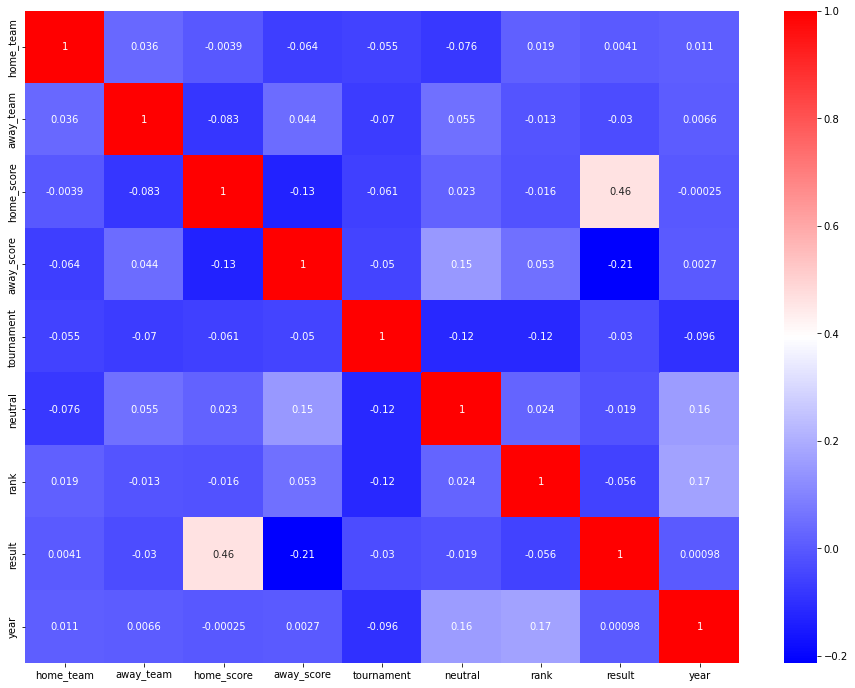

In [1089]:
# plotting a correlation map
plt.figure(figsize=(16, 12))
sns.heatmap(soccer3.corr(), cmap='bwr', annot=True);

* homescore is slightly positively correlated to the result, that is whether it's a win, loss or draw

In [1090]:
# importing VIF libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1091]:
#using variance inflation factor to check correlation
 
# creating a dataframe
vif = pd.DataFrame()
vif["feature"] = m.columns
  
# calculating VIF for each feature
vif["vif"] = [variance_inflation_factor(m.values, i)
                          for i in range(len(m.columns))]
  
vif

,feature,vif
0,tournament,4.576984
1,away_score,1.631161
2,home_score,1.632792
3,away_team,3.227701
4,home_team,3.490140


* The variables are slightly correlated since the VIF scores are all less than 5
* These feature variables are therefore suitable for modelling


# Q1.

Predict how many goals the home team scores.

In [1092]:
# creating a dataset grouped by rank
poly =  soccer4.groupby(['rank']).mean()

poly.head(2)

,home_score,away_score,tournament,neutral,year
rank,,,,,
1.0,1.750000,0.875000,17.750000,0.125,2002.375000
2.0,1.142857,0.571429,19.857143,0.000,2006.714286


In [1093]:
# setting the x and y variables
# turning the values into a multidimentional np array so we can plot it
X = poly.index.values.reshape(-1,1)

y = poly['home_score'].values.reshape(-1,1)

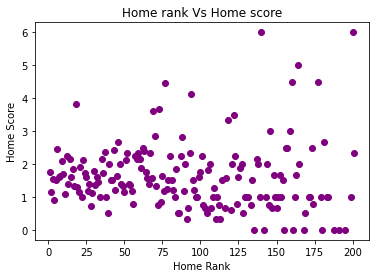

In [1094]:
#  Visualizing the dataset by plotting a scatter plot

plt.scatter(X, y, color='purple') 
plt.title('Home rank Vs Home score')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()

In [1095]:
# Splitting the dataset into train and test sets
X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

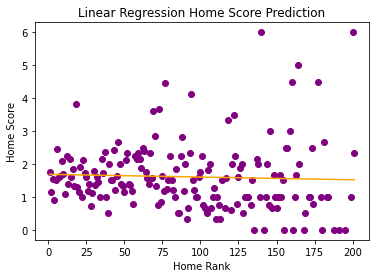

In [1096]:
# Fit Linear Regression model to the dataset
# to compare the linear regression model to the polynomial regression model
reg_line = LinearRegression()
reg_line.fit(X,y)

# Visualize the Linear Regression results
plt.scatter(X, y, color='purple') 
plt.plot(X, reg_line.predict(X), color='orange')
plt.title('Linear Regression Home Score Prediction')
plt.xlabel('Home Rank')
plt.ylabel('Home Score')
plt.show()


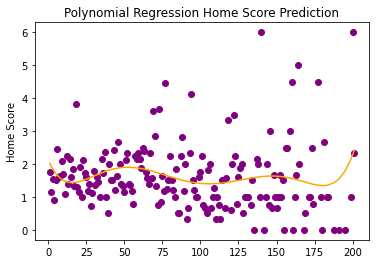

In [1097]:

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


#Visualize the Polynomial Regression results
plt.scatter(X, y, color='purple') # To help highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='orange')
plt.title('Polynomial Regression Home Score Prediction')
plt.ylabel('Home Score')
plt.show()


In [1098]:
# Now we can predict using polyregression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Polynomial prediction: 1


* the hometeam scores one goal as per the prediction

## Cross Validation

In [1099]:
from sklearn.model_selection import KFold
from sklearn import metrics    

In [1100]:
# setting our nsplits as 5 first
folds = KFold(n_splits=5)

print("Number of folds: " +str(folds.get_n_splits(X)))

# creating and assessing 5 models based on the folds we created.

# this array records RSME of each model while the for loop prints them
RMSES = [] 
count = 1  
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Number of folds: 5

Training model 1
Model 1 Root Mean Squared Error: 0.5639881911743142

Training model 2
Model 2 Root Mean Squared Error: 0.6859362861734254

Training model 3
Model 3 Root Mean Squared Error: 0.97827564190871

Training model 4
Model 4 Root Mean Squared Error: 1.164887279143278

Training model 5
Model 5 Root Mean Squared Error: 1.5041098204009087


* <font color = 'green'>model 1 </font>is most suitable for making home_score presictions since it has the least RMSE 


In [1101]:
# analysing our residuals
residuals = np.subtract(y_pred, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()



,0
count,35.000000
mean,-0.151922
std,1.518264
min,-4.604652
25%,-0.984422
50%,0.424522
75%,0.727227
max,1.472574


* the residuals mean is -0.1519217136330956 

## Residual Plots


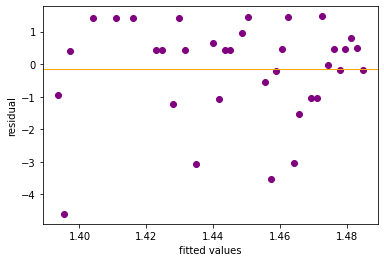

In [1102]:
# plotting our residuals
# 

import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='purple')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='orange', linewidth=1)
plt.show()

## Heteroskedasticity

* Basically checking whether the variance of the residuals is unequal over a range of measured values. 

* heteroskedasticity results in an unequal scatter of the residuals in a regression analysis so that's exacly what we're looking for
ie 

**The null hypothesis (H0)**: Signifies that Homoscedasticity is present.

**The alternative hypothesis(Ha)**: Signifies that the Homoscedasticity is not present
(i.e. heteroscedasticity exists)

In [1124]:
!pip3 install numpy pandas statsmodels

In [1131]:
# Importing libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=soccer3).fit()

# Inspect the results
print(results.summary())

PatsyError: ignored

In [1103]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

crit = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > crit):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

ValueError: ignored

# Q2. 
Predict how many goals the away team scores.

In [1107]:
# to get the x and y variables

x = poly.index.values.reshape(-1,1)

Y = poly['away_score'].values.reshape(-1,1)

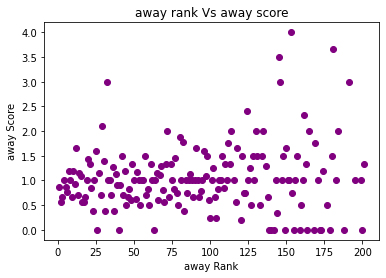

In [1109]:
#  Visualizing the dataset by plotting a scatter plot

plt.scatter(x, Y, color='purple') 
plt.title('away rank Vs away score')
plt.xlabel('away Rank')
plt.ylabel('away Score')
plt.show()

In [ ]:
# Splitting the dataset into train and test sets
x_train, Y_train, x_test, Y_test = train_test_split(x,Y, test_size = 0.2, random_state=0)

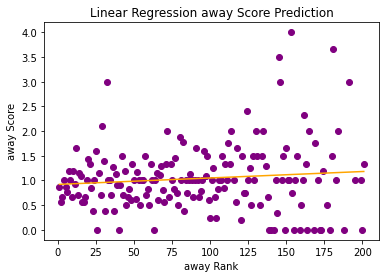

In [1111]:
# Fit Linear Regression model to the dataset
# to compare the linear regression model to the polynomial regression model
reg_line = LinearRegression()
reg_line.fit(x,Y)

# Visualize the Linear Regression results
plt.scatter(x,Y, color='purple') 
plt.plot(x, reg_line.predict(x), color='orange')
plt.title('Linear Regression away Score Prediction')
plt.xlabel('away Rank')
plt.ylabel('away Score')
plt.show()

In [1112]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
x_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(x_poly, Y)

LinearRegression()

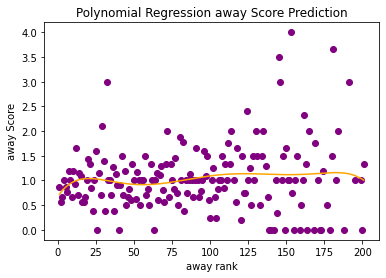

In [1114]:
#Visualize the Polynomial Regression results
plt.scatter(x, Y, color='purple') # To help highlight the data points
plt.plot(x, pol_reg.predict(x_poly), color='orange')
plt.title('Polynomial Regression away Score Prediction')
plt.xlabel('away rank')
plt.ylabel('away Score')
plt.show()

In [1115]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

Polynomial prediction: 0


* The Away team will score zero goals as per the prediction model

## Cross Validation

In [1116]:
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(x)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  x_train, x_test = x[train_index], x[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(x_train, Y_train)
  
  # assess the accuraccy of the model
  Y_pred = regressor.predict(x_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.5351640292578657

Training model 2
Model 2 Root Mean Squared Error: 0.4210064807198101

Training model 3
Model 3 Root Mean Squared Error: 0.4025673993204819

Training model 4
Model 4 Root Mean Squared Error: 0.7988890056074233

Training model 5
Model 5 Root Mean Squared Error: 1.0222871919628087


* <font color = 'green'>model 3</font> is the most suitable model for making predictions since it has the least RMSE 

In [1120]:
residuals2 = np.subtract(Y_pred, Y_test)

# Let's describe our residual:
pd.DataFrame(residuals2).describe()

,0
count,35.000000
mean,0.111172
std,1.031060
min,-2.820091
25%,-0.321048
50%,0.195224
75%,1.177995
max,1.269883


* the mean for residuals is 0.11117241977416314

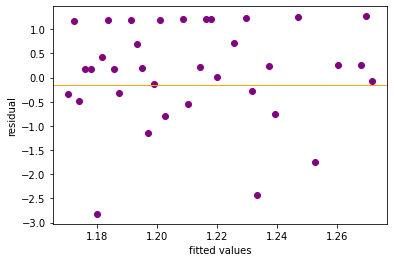

In [1122]:
import matplotlib.pyplot as plt

plt.scatter(Y_pred, residuals2, color='purple')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='orange', linewidth=1)
plt.show()

## Key
**soccer**: merged dataset

**soccer2**: soccer df without missing values(see <font color = orange>*Merging the Datasets* section</font> )

**soccer3**: soccer2 with categorical datatypes(see <font color = orange>*Label Encoding* section</font> )

**m**: feature variables ued while calculating the vif

**j**: target variable used in predicting rank